# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

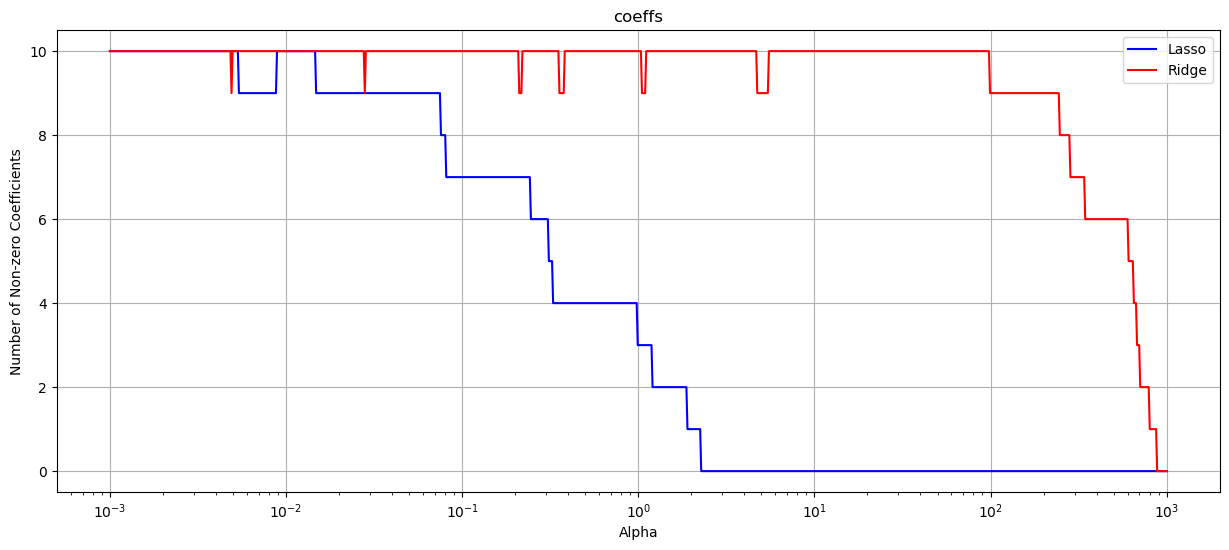

In [4]:
# code here
#коэффициенты регулизации:
alphas = np.logspace(-3, 3, num = 1000, base = 10.0)

lasso_nonzero = []
ridge_nonzero = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)
    
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    
    lasso_nonzero.append(np.sum(np.abs(lasso.coef_) > 0.8))
    ridge_nonzero.append(np.sum(np.abs(ridge.coef_) > 0.8))

plt.figure(figsize=(15, 6))

plt.plot(alphas, lasso_nonzero, linestyle='-', color='b', label='Lasso')
plt.plot(alphas, ridge_nonzero, linestyle='-', color='r', label='Ridge')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Non-zero Coefficients')
plt.title('coeffs')
plt.legend()
plt.grid(True)
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [6]:
# code here
rid = Ridge()
rid.fit(X_train, y_train)
pred = rid.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}') 
print(f'R^2: {r2}')

RMSE: 58.304295113912275
MAE: 49.602750809651916
R^2: 0.359902022000946


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

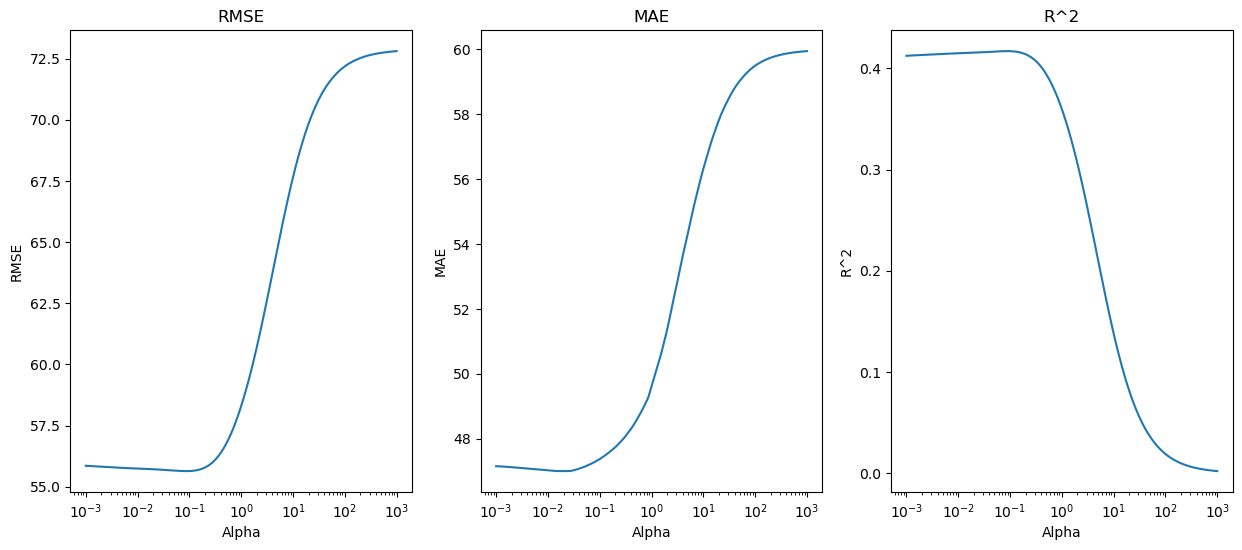

Optimal alpha: 0.08708431497690725
RMSE (optimal alpha): 55.639131053314316
MAE (optimal alpha): 47.31787101969084
R^2 (optimal alpha): 0.4170839216826199


In [9]:
# code here

rmse = []
mae = []
r2 = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    
    rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
    mae.append(mean_absolute_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))


plt.figure(figsize=(15, 6))
#RMSE
plt.subplot(1, 3, 1)
plt.plot(alphas, rmse)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE')

# MAE
plt.subplot(1, 3, 2)
plt.plot(alphas, mae)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('MAE')

# R^2
plt.subplot(1, 3, 3)
plt.plot(alphas, r2)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.title('R^2')

plt.show()


optimal_alpha = alphas[np.argmin(rmse)]

ridge_optimal = Ridge(alpha=optimal_alpha)
ridge_optimal.fit(X_train, y_train)

y_pred_optimal = ridge_optimal.predict(X_test)

rmse_optimal = np.sqrt(mean_squared_error(y_test, y_pred_optimal))
mae_optimal = mean_absolute_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)

print(f'Optimal alpha: {optimal_alpha}')
print(f'RMSE (optimal alpha): {rmse_optimal}')
print(f'MAE (optimal alpha): {mae_optimal}')
print(f'R^2 (optimal alpha): {r2_optimal}')

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

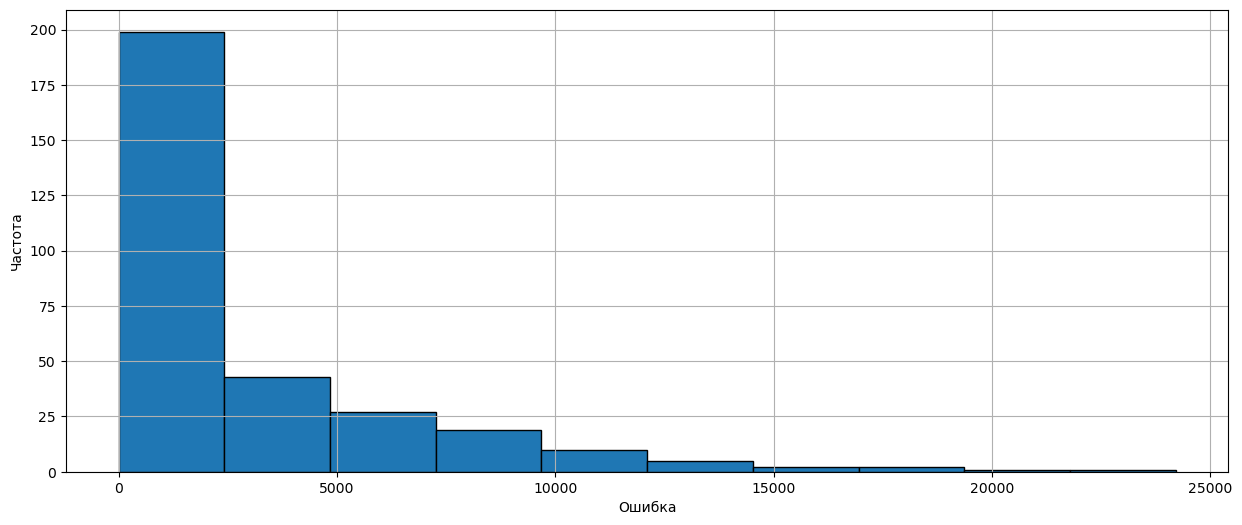

In [10]:
# code here
y_train_pred = ridge_optimal.predict(X_train)
errors = (y_train - y_train_pred)**2

plt.figure(figsize=(15, 6))
plt.hist(errors, edgecolor='black')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [11]:
# code here
fuuuu = np.median(errors)

X_train_filtered = X_train[errors <= fuuuu]
y_train_filtered = y_train[errors <= fuuuu]

ridge_filtered = Ridge(alpha=optimal_alpha)
ridge_filtered.fit(X_train_filtered, y_train_filtered)

y_pred_filtered = ridge_filtered.predict(X_test)

rmse_filtered = np.sqrt(mean_squared_error(y_test, y_pred_filtered))
mae_filtered = mean_absolute_error(y_test, y_pred_filtered)
r2_filtered = r2_score(y_test, y_pred_filtered)

print(f'RMSE (с удаленными выбросами): {rmse_filtered}')
print(f'MAE (с удаленными выбросами): {mae_filtered}')
print(f'R^2 (с удаленными выбросами): {r2_filtered}')

RMSE (с удаленными выбросами): 56.00265530649062
MAE (с удаленными выбросами): 47.96944862427947
R^2 (с удаленными выбросами): 0.40944194822829605


In [12]:
# стало хуже...... обидка((_((
# интернет в помощь

lower_quantile = np.percentile(errors, 25)
upper_quantile = np.percentile(errors, 75)

lower_bound = lower_quantile - 1.5 * (upper_quantile - lower_quantile)
upper_bound = upper_quantile + 1.5 * (upper_quantile - lower_quantile)

X_train_filtered = X_train[(errors >= lower_bound) & (errors <= upper_bound)]
y_train_filtered = y_train[(errors >= lower_bound) & (errors <= upper_bound)]

ridge_filtered = Ridge(alpha=optimal_alpha)
ridge_filtered.fit(X_train_filtered, y_train_filtered)

y_pred_filtered = ridge_filtered.predict(X_test)

rmse_filtered = np.sqrt(mean_squared_error(y_test, y_pred_filtered))
mae_filtered = mean_absolute_error(y_test, y_pred_filtered)
r2_filtered = r2_score(y_test, y_pred_filtered)

print(f'RMSE (с исключенными выбросами): {rmse_filtered}')
print(f'MAE (с исключенными выбросами): {mae_filtered}')
print(f'R^2 (с исключенными выбросами): {r2_filtered}')
#((

RMSE (с исключенными выбросами): 56.401569383841704
MAE (с исключенными выбросами): 47.45705541361105
R^2 (с исключенными выбросами): 0.4009987428435703


__Задание 3.__ Отчёт

**(2 балла)**

In [13]:
# code here
HAPPY END
1) разобрался с ошибками (RMSE, MAE, R^2)
2) Научился считать метрики и подбирать alpha оптимальное по разным ошибкам 
3) Изучил несколько методов для исключения выбросов и уменьшения ошибок

SyntaxError: unmatched ')' (4200178807.py, line 3)